# Исследование глобальных продаж компьютерных игр

Для анализа взяты  исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Целью исследования является выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке
- EU_sales — продажи в Европе
- JP_sales — продажи в Японии
- Other_sales — продажи в других странах
- Critic_Score — оценка критиков
- User_Score — оценка пользователей
- Rating — рейтинг ESRB

## Откроем файл с данными и изучим общую информацию


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv()
except:
    data = pd.read_csv()

data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Запомним, сколько было данных до предобработки.

In [4]:
old_data_shape = data.shape[0]
print('Исходное количество единиц наблюдения:', old_data_shape)

Исходное количество единиц наблюдения: 16715


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


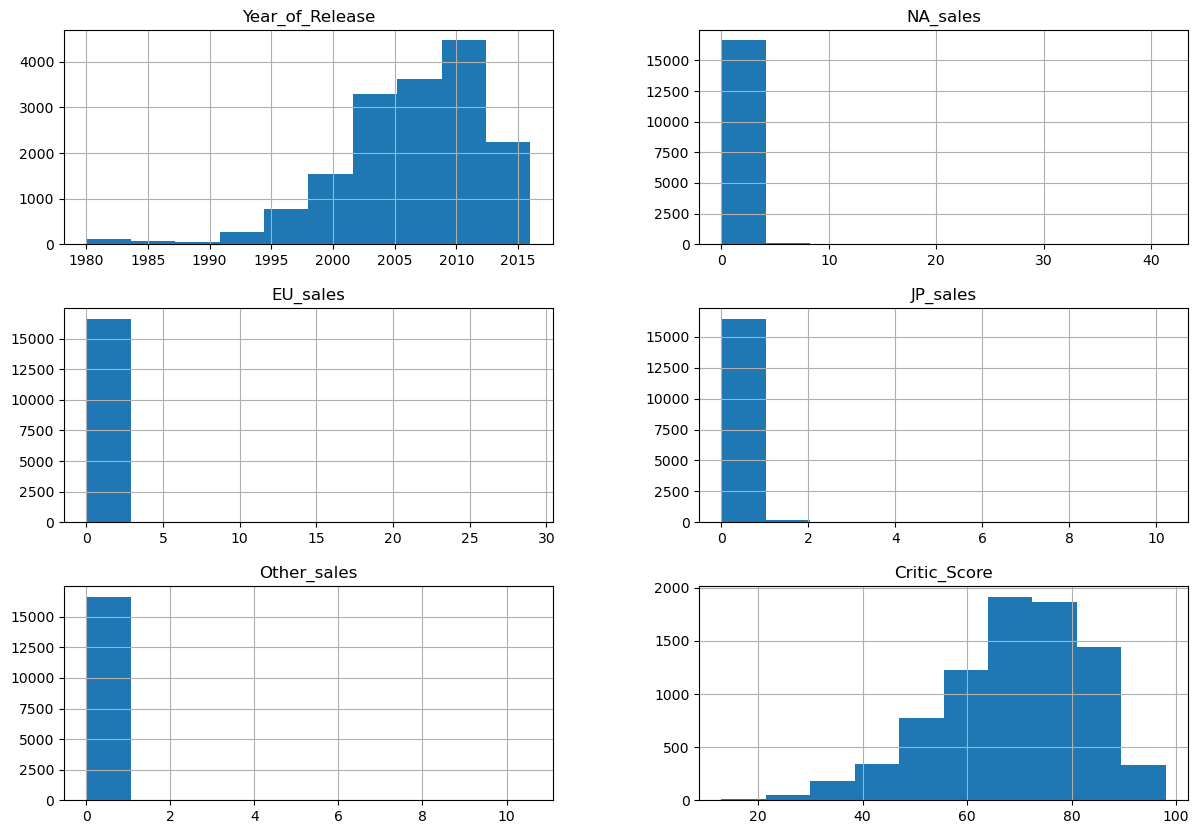

In [7]:
data.hist(figsize=(14.5, 10));

In [8]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Из общей информации по датасету можно выделить следующие направления предобработки:**

1. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating имеются пропуски. Необходимо заполнить недостающими данными там, где это возможно, остальные исключить из анализа.
2. В столбцах User_Score и Year_of_Release типы данных не соответствуют содержанию показателей: год должен быть указан целым числом (необходимо изменить тип данных на int), а оценка пользователей должна быть числовым значением (необходимо изменить тип данных на float).
3. По гистограммам и описательной статистики видно, что во всех показателях по продажам преобладают нулевые значения. Скорее всего, это связано с продажей таких игр в конкретный регион, поэтому по остальным регионам продажи могут быть нулевыми.
4. Названия столбцов стоит привести к формализованному виду, исключив верхний регистр символов.

## Подготовим данные к исследовательскому анализу

### Замена названий столбцов

In [9]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков, дубликатов и типов данных

**Предобработка столбцов name, platform и genre**

В столбцах name и genre по 2 пропуска, проверим, относятся ли они к одним и тем же строкам.

In [10]:
data[(data['name'].isna()) | (data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, это одинаковые строки, которые не являются информативными для целей данного анализа (большое количество пропусков и устаревший временной период). В связи с этим, эти строки можно удалить.

In [11]:
data = data.dropna(subset=['name', 'genre'])
print('Количество пропусков в столбце name:', data['name'].isna().sum())
print('Количество пропусков в столбце genre:', data['genre'].isna().sum())

Количество пропусков в столбце name: 0
Количество пропусков в столбце genre: 0


Проверим столбцы genre и platform на наличие неявных дубликатов.

In [12]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дубликаты отсутствуют.

Проверим столбец name на наличие дубликатов.

In [14]:
data['name'].duplicated().sum()

5154

Возможно, это игры для разных платформ или переизданы. Проверим это.

In [15]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [16]:
data[((data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Действительно, наше предположение оказалось верным. 

Остается один дубликат. Избавимся от него: суммируем продажи в Европе и запишем в одну из строк, другую строку удалим.

In [17]:
data.loc[data.loc[604, 'eu_sales']] = 0.23
data = data.drop([16230])

**Предобработка столбца year_of_release**

В данном столбце 269 пропусков. Посмотрим на описательную статистику по ним и уникальные значения по платформам и рейтингам.

In [18]:
data[data['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [19]:
data[data['year_of_release'].isna()]['platform'].unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [20]:
data[data['year_of_release'].isna()]['rating'].unique()

array(['E', 'E10+', nan, 'T', 'M', 'RP'], dtype=object)

Никакой закономерности здесь не видно, поэтому восстановить пропуски без потери качества данных не получится. Поскольку год является ключевым показателем для прогнозирования, придется удалить строки с пропущенными значениями. Также есть объект со значением года выпуска 0, его тоже удалим.

In [21]:
data = data.loc[(data['year_of_release'].notna()) & ~(data['year_of_release'] == 0)]
print('Количество пропусков в столбце year_of_release:',
      data['year_of_release'].isna().sum()
     )
print('Количество нулевых значений в столбце year_of_release:',
      data[data['year_of_release'] == 0]['name'].count())

Количество пропусков в столбце year_of_release: 0
Количество нулевых значений в столбце year_of_release: 0


Как уже было ранее отмечено, в столбце year_of_release тип данных не соответствует содержанию показателя - год должен быть указан целым числом. Необходимо изменить тип данных в этом столбце на int.

In [22]:
data['year_of_release'] = data['year_of_release'].astype('int')
print('Тип данных в столбце year_of_release:', data['year_of_release'].dtypes)

Тип данных в столбце year_of_release: int32


**Предобработка столбцов critic_score, user_score и rating**

В столбце user_score имеются значения "tbd", аббревиатура, означающая To Be Determined (будет определено). По сути, это те же пропуски. Для удобства работы с этими объектами, tbd можно заменить на NaN.

In [23]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN
print('Количество объектов наблюдения с оценкой пользователей tbd:',
      data.loc[data['user_score'] == 'tbd']['user_score'].count()
     )

Количество объектов наблюдения с оценкой пользователей tbd: 0


Теперь посмотрим на информацию по пропускам по столбцам critic_score, user_score, rating

In [24]:
print('Количество пропусков по столбцу critic_score:', data['critic_score'].isna().sum())
print('Количество пропусков по столбцу user_score:', data['user_score'].isna().sum())
print('Количество пропусков по столбцу rating:', data['rating'].isna().sum())
print('Количество единиц наблюдения, в которых есть хотя бы один пропуск:',
      data[(data['critic_score'].isna())
           | (data['user_score'].isna())
           | (data['rating'].isna())]['name']
           .count()
     )
print('Процент пропусков от первоначальных данных {:.2%}'.format(
       (data[(data['critic_score'].isna())
                 | (data['user_score'].isna())
                 | (data['rating'].isna())]['name']
                 .count()
                 / old_data_shape)
                                                                 )
     )

Количество пропусков по столбцу critic_score: 8461
Количество пропусков по столбцу user_score: 8981
Количество пропусков по столбцу rating: 6676
Количество единиц наблюдения, в которых есть хотя бы один пропуск: 9618
Процент пропусков от первоначальных данных 57.54%


Здесь видно, что в большинстве случаев, если нет оценки пользователей, то нет и оценки критиков, и рейтинга.

Посмотрим, как распределены пропуски по годам и платформам. Может быть, там есть какая-то закономерность.

In [25]:
data[(data['critic_score'].isna())
     | (data['user_score'].isna())
     | (data['rating'].isna())]\
     .groupby('year_of_release')['name']\
     .count().sort_values(ascending=False).head(10)

year_of_release
2009    876
2008    835
2010    826
2011    682
2007    607
2006    478
2015    395
2005    377
2002    374
1998    354
Name: name, dtype: int64

In [26]:
data[(data['critic_score'].isna())
     | (data['user_score'].isna())
     | (data['rating'].isna())]\
     .groupby('platform')['name']\
     .count().sort_values(ascending=False).head(10)

platform
DS      1657
PS      1040
PS2      987
Wii      807
PSP      803
GBA      574
PS3      537
X360     374
3DS      357
N64      316
Name: name, dtype: int64

Закономерностей, позволившим бы нам заполнить пропуски, не видно. Здесь нужна какая-то дополнительная информация. В виду того, что такой информации нет, поставим вместо пропусков рейтинга заглушки, остальные оставим как есть.

In [27]:
data['rating'] = data['rating'].fillna(value='unknown')

Осталось изменить тип данных в столбце user_score. Сейчас в столбце строковые значения object, изменим их на float.

In [28]:
data['user_score'] = data['user_score'].astype('float')
print('Тип данных в столбце user_score:', data['user_score'].dtypes)

Тип данных в столбце user_score: float64


**Предобработка столбцов na_sales, eu_sales, jp_sales, other_sales**

Как ранее было отмечено, в этих столбцах преобладают нулевые значения. Возможно, это связано с адаптацией игр к региону и их платформам, поэтому по остальным продажи могут быть нулевыми. Решением этой проблемы будет суммирование продаж по всем регионам и последующий анализ именно по этому показателю.

In [29]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['total_sales'].describe()

count    16444.000000
mean         0.536079
std          1.558783
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [30]:
print('Количество игр с нулевыми продажами:', data[data['total_sales'] == 0]['name'].count())

Количество игр с нулевыми продажами: 2


Остались всего 2 игры с нулевыми продажами. Значит, наше предположение оказалось верно.

**Выводы по разделу:**

1. В ходе предобработки данных были проанализированы объекты с пропущенные значениями. Там, где это возможно, пропуски были удалены, остальные оставлены. Точные причины наличия пропусков назвать сложно, но можно предположить, что по годам релиза данные были утеряны при выгрузке/загрузке в базу данных, а по оценкам и рейтингу не было возможности собрать информацию.


2. По двум столбцам (user_score и year_of_release) были скорректированы типы данных:

    - В столбце user_score из-за наличия в нем аббревиатуры tbd (To Be Determined - будет определено) был установлен тип данных object. После замены tbd на пропуски NaN был изменен типа данных на float.
    - В столбце year_of_release изначально тип данных float не соответствовал содержанию показателя. Поскольку год - дискретная величина, тип данных в этом столбце был изменен на целочисленный int.
    
    
3. По столбцам name, platform и year_of_release был найден один дубликат, который был устранен путем суммирования числовых значений по продажам и записи в единую строку.


4. Был добавлен новый столбец total_sales, содержащий суммарные продажи, для дальнейшего исследовательского анализа.

## Исследовательский анализ данных

### Выпуск игр по годам

In [31]:
data.groupby('year_of_release')['year_of_release'].count()

year_of_release
0          1
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

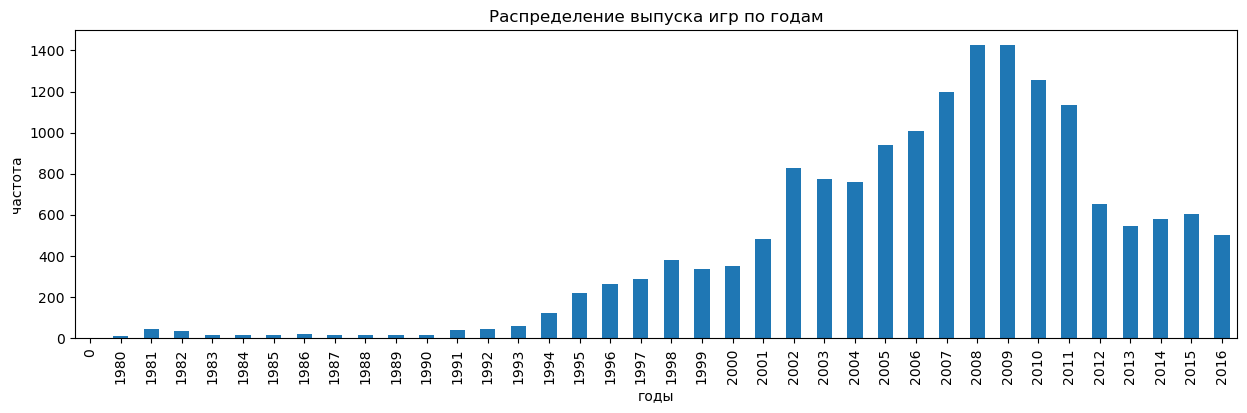

In [32]:
data.groupby('year_of_release')['year_of_release']\
    .count().plot(kind='bar', title='Распределение выпуска игр по годам', figsize=(15, 4))
plt.xlabel('годы')
plt.ylabel('частота');

**Выводы по графику:**

1. По графику видно, что рост количества выпускаемых игр продолжался до 2009 года. Пик выпуска пришелся на 2008-2009 годы.

2. Начиная с 2010 года, количество выпускаемых игр сокращалось вплоть до 2013 года. Самое сильное сокращение произошло в 2012 году, когда количество выпущенных игр стало почти в 2 раза (на 42,6%) меньше.

3. Принимая во внимание, что данные за 2016 год неполные, можно отметить небольшой, но стабильный рост количества выпускаемых игр, начиная с 2013 года.

### Анализ продаж в разрезе платформ

Отберем 10 платформ с наибольшими суммарными продажами и построим распределение продаж по годам.

In [33]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(12)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
Name: total_sales, dtype: float64

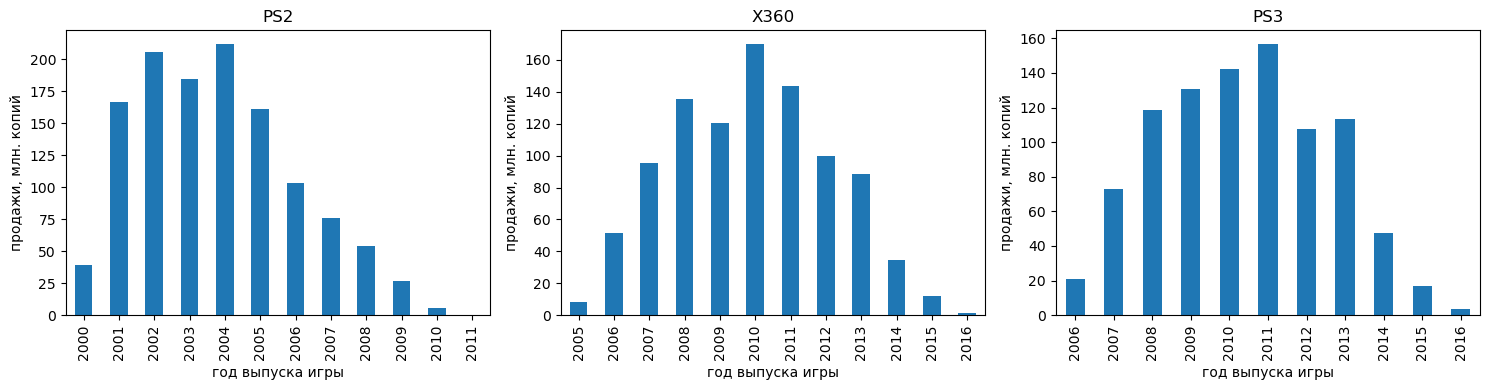

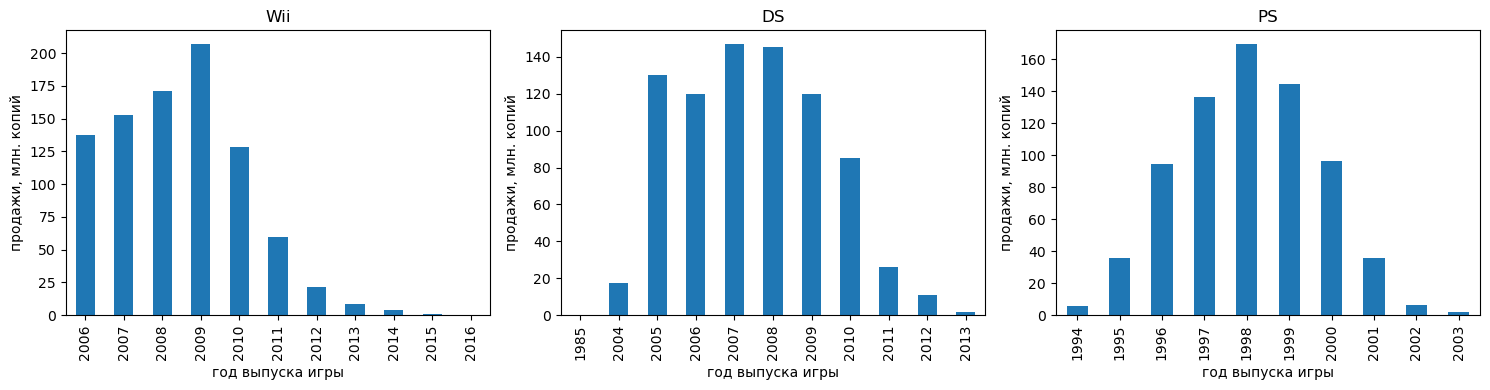

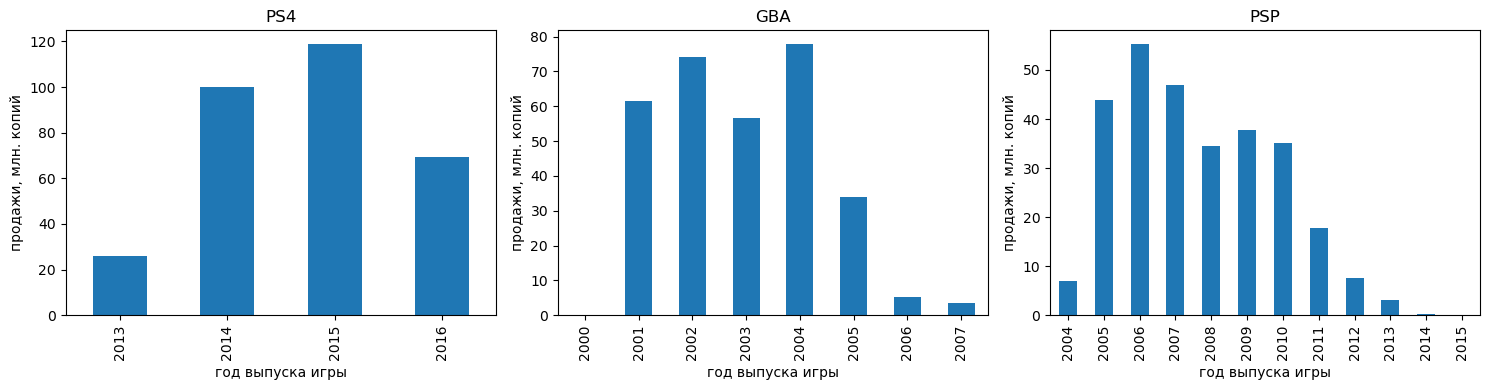

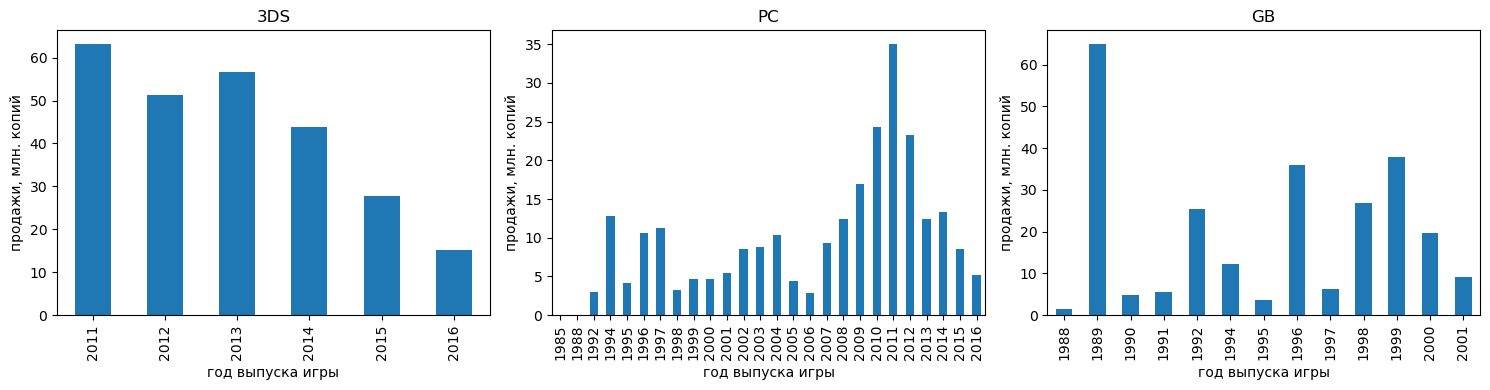

In [34]:
platform_list = []
for platform in data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(12).index:
    if platform not in platform_list:
        platform_list.append(platform)

for j in range(0, 10, 3):
    for i in range(3):
        plt.subplot(1, 3, i+1)
        data[data['platform'] == platform_list[i+j]].groupby('year_of_release')['total_sales']\
        .sum().plot(kind='bar', title=platform_list[i+j], figsize=(15, 4))
        plt.xlabel('год выпуска игры')
        plt.ylabel('продажи, млн. копий');
    plt.tight_layout()
    plt.show()

По графикам видно, что у популярных платформ срок жизни больше 8 лет. Посмотрим, как обстоит дело с полным охватом платформ.

In [35]:
lifetime = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
lifetime.columns = ['platform','min_year', 'max_year']
lifetime['lifetime'] = lifetime['max_year'] - lifetime['min_year']
lifetime['lifetime'].describe()

count    32.000000
mean      7.375000
std       7.014961
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifetime, dtype: float64

**Вывод по подразделу:**

1. Данные показали, что у 75% платформ жизненный цикл более 3 лет, медианный жизненный цикл составляет 6 лет. Для популярных платформ этот период еще больше - более 8 лет.
2. Динамика выпуска игр изменилась в 2009 году. Самое сильное сокращение произошло в 2012 году, после чего серьезных изменений в индустрии не было.

За 2016 год данные могут быть неполными. Кроме того, если игра выпущена в 2016 года, то необходим временной лаг для формирования стабильных продаж. Учитывая предшествующий анализ, в качестве релевантного периода выберем выпуск игр за 2013-2016 годы. Но при анализе будем учитывать неполноту данных по играм, выпущенным в 2016 году.

### Анализ продаж в разрезе платформ за актуальный период

Посмотрим на распределение продаж по платформам по играм 2013-2016 годов выпуска.

In [36]:
relevant_data = data.query('year_of_release > 2012')
relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

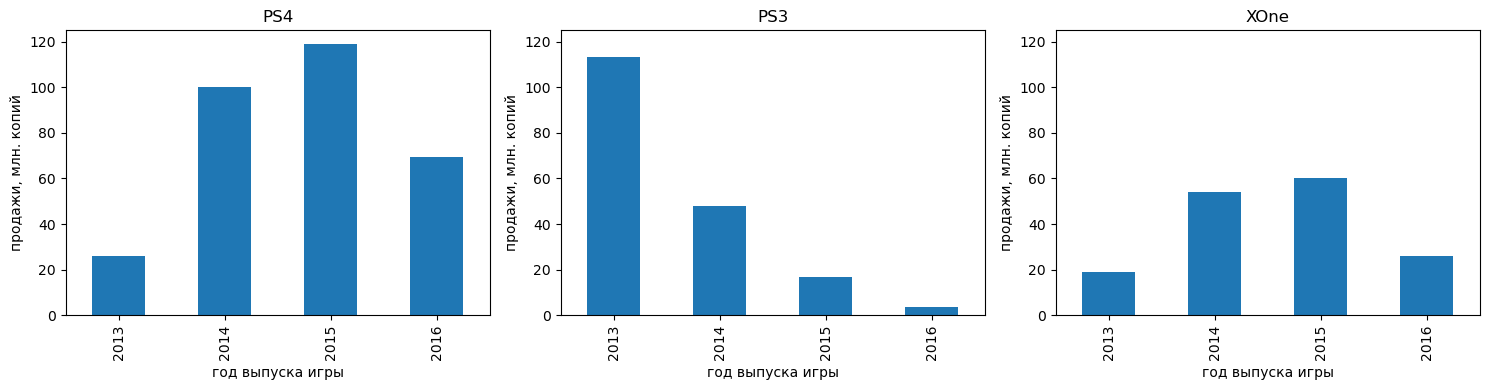

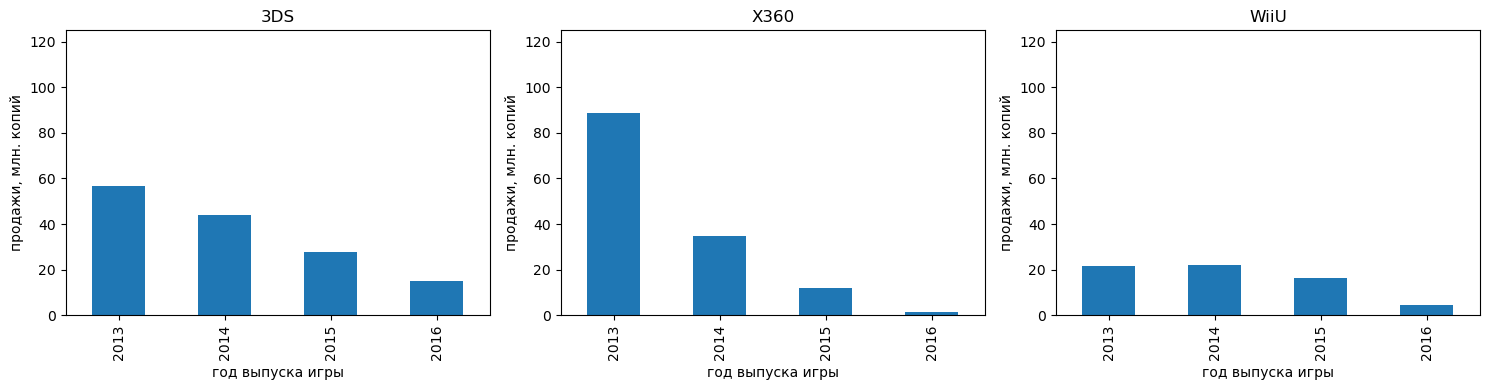

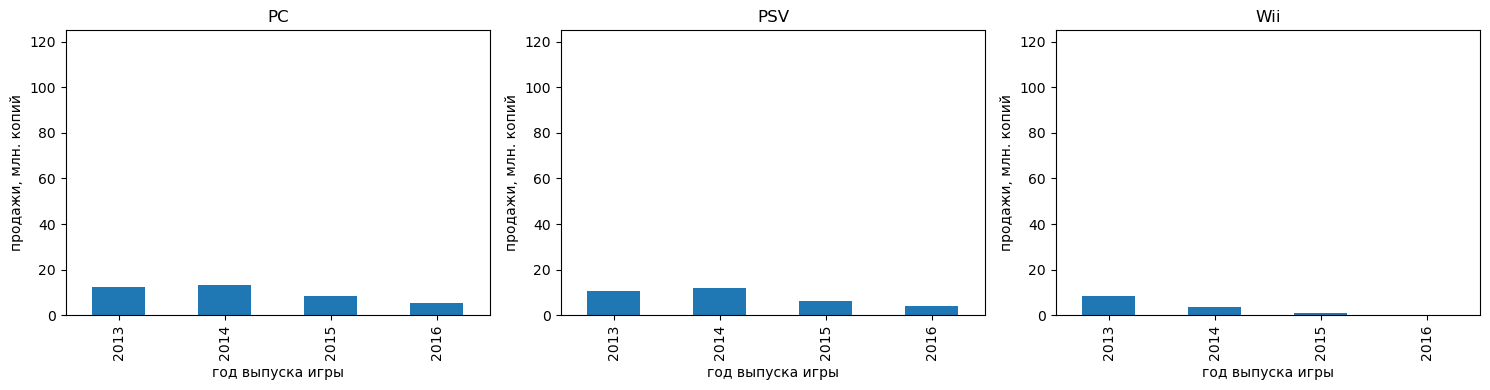

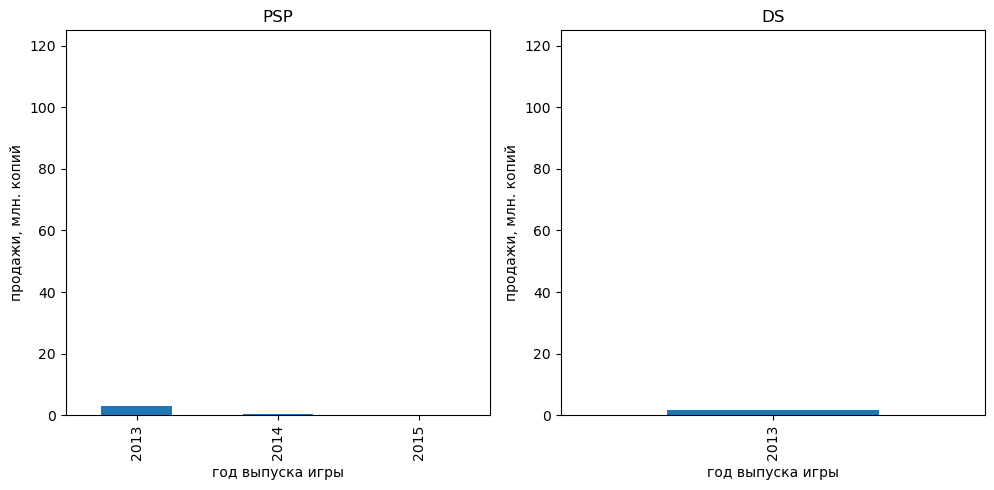

In [37]:
platform_list = []
for platform in relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index:
    if platform not in platform_list:
        platform_list.append(platform)

for j in [0, 3, 6]:
    for i in range(3):
        plt.subplot(1, 3, i+1)
        relevant_data[relevant_data['platform'] == platform_list[i+j]].groupby('year_of_release')['total_sales']\
        .sum().plot(kind='bar', title=platform_list[i+j], figsize=(15, 4))
        plt.xlabel('год выпуска игры')
        plt.ylabel('продажи, млн. копий')
        plt.ylim(0, 125);
    plt.tight_layout()
    plt.show()

for i in [1, 2]:
    plt.subplot(1, 3, i)
    relevant_data[relevant_data['platform'] == platform_list[i+8]].groupby('year_of_release')['total_sales']\
    .sum().plot(kind='bar', title=platform_list[i+8], figsize=(15, 5))
    plt.xlabel('год выпуска игры')
    plt.ylabel('продажи, млн. копий')
    plt.ylim(0, 125);
plt.tight_layout()
plt.show()

**Выводы по графикам:**

1. Показатели по играм, выпущенным в 2016 году у всех платформ ниже, чем по играм 2015 года. Это нормально, поскольку данные за 2016 год неполные.
2. Судя по графикам, к потенциально прибыльным платформам можно отнести PS4 и XOne. Для этих платформ: чем свежее игра, тем она лучше продается. И в целом, у этих платформ одни из самых высоких продаж.
3. Если учитывать стабильность продаж игр, выпущенных в течение 2013-2015 годов, то стоит выделить платформу WiiU и PC.
4. По остальным платформам свежие игры продаются меньше, что может быть сигналом о снижении к ним интереса и, соответственно, снижению в будущем прибыльности.
5. Также по графикам видно, что платформы PSP и DS прекратили свое существование к 2016 году. Их можно исключить из дальнейшего анализа.


Теперь рассмотрим вариабельность глобальных продаж по платформам.

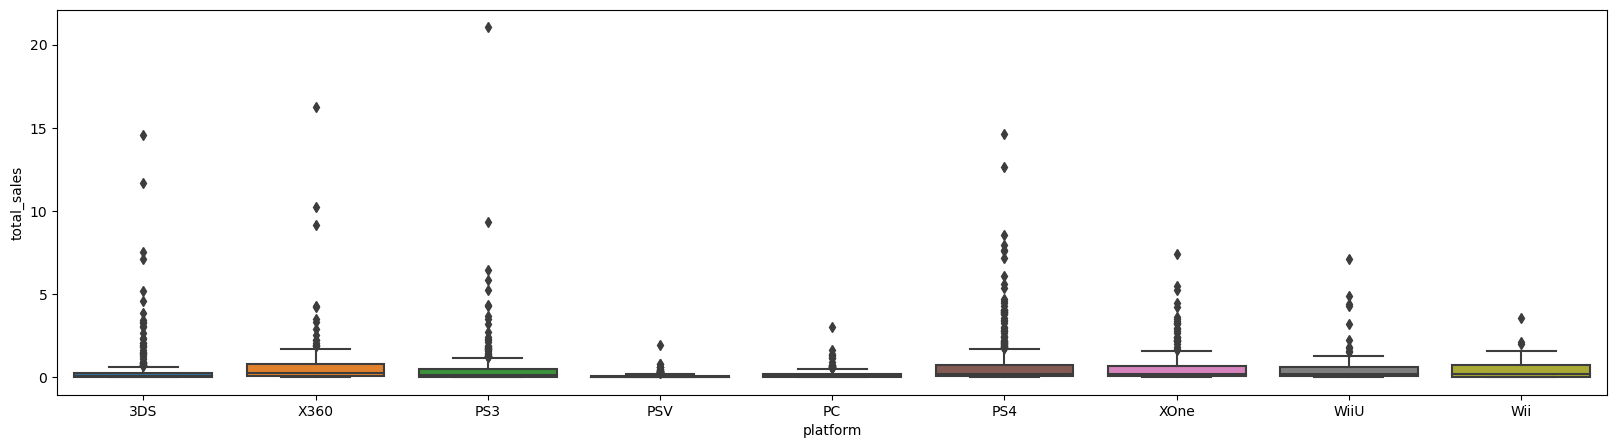

In [38]:
relevant_data = relevant_data.query('not platform == "PSP" and not platform == "DS"')
relevant_data_var = relevant_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
relevant_data_var.columns = ['name', 'platform', 'total_sales']

plt.figure(figsize=(20, 5))
sns.boxplot(x='platform', y='total_sales', data=relevant_data_var)

plt.show()

На графике видно, что успех платформ 3SD, X360, PS3, PS4 связан с большими продажами единичных игр.

Посмотрим "ящики" поближе.

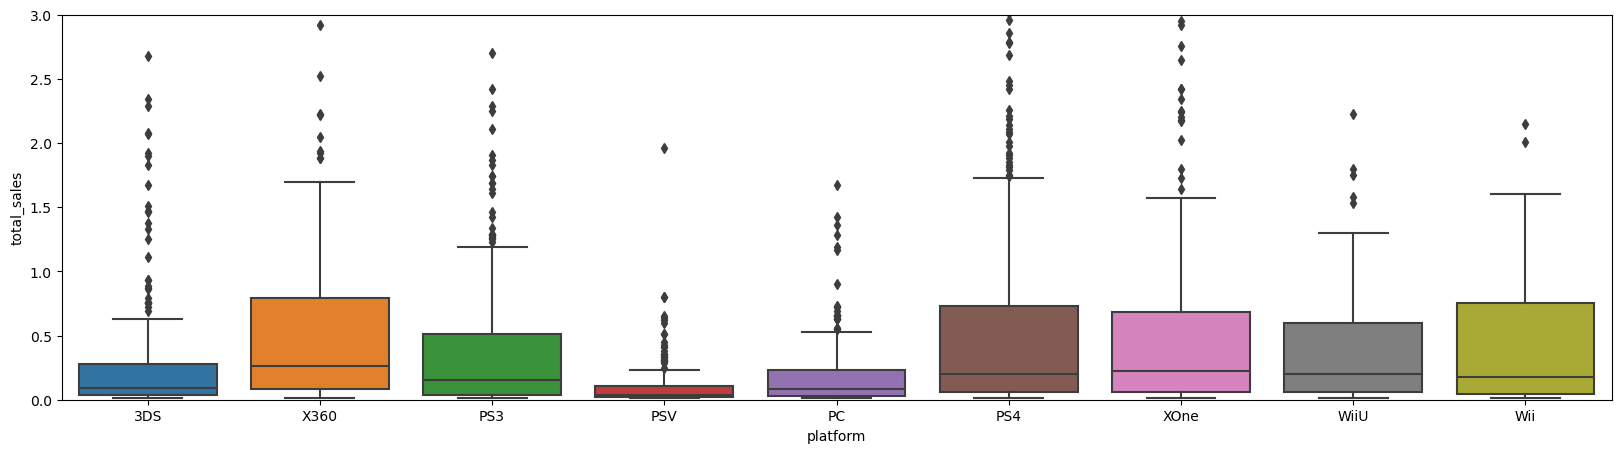

In [39]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='platform', y='total_sales', data=relevant_data_var)
plt.ylim(0, 3)

plt.show()

**Выводы по графику**:

1. По графику видно, что по платформам PSV, 3DS и PC в среднем невысокие продажи.


2. Наиболее стабильными выглядят платформы X360, PS4, XOne, WiiU, Wii. Сопоставив с предыдущими результатами исследования, можно сделать следующие выводы:
- из указанных платформ в категорию потенциально прибыльных ранее у нас попали PS4 и XOne, что и подтвердил этот график;
- медианное значение продаж игр для платформы X360 оказалось выше остальных за счет игр 2013 года выпуска.
- высокие медианное и третье квартильное значения при суммарно низких продажах по платформе Wii говорит, о том, что в целом продажи равномерно распределены вокруг низкого уровня, без выбросов.

### Влияние отзывов пользователей и критиков на продажи

#### По платформе PS4

Рассмотрим влияние отзывов пользователей и критиков на продажи примере платформы PS4, имеющей самые высокие продажи игр в 2013-2016 годах.

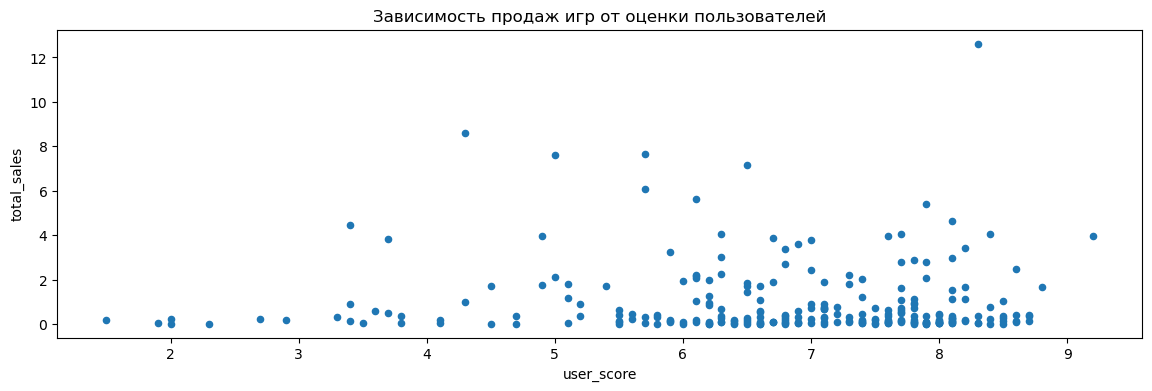

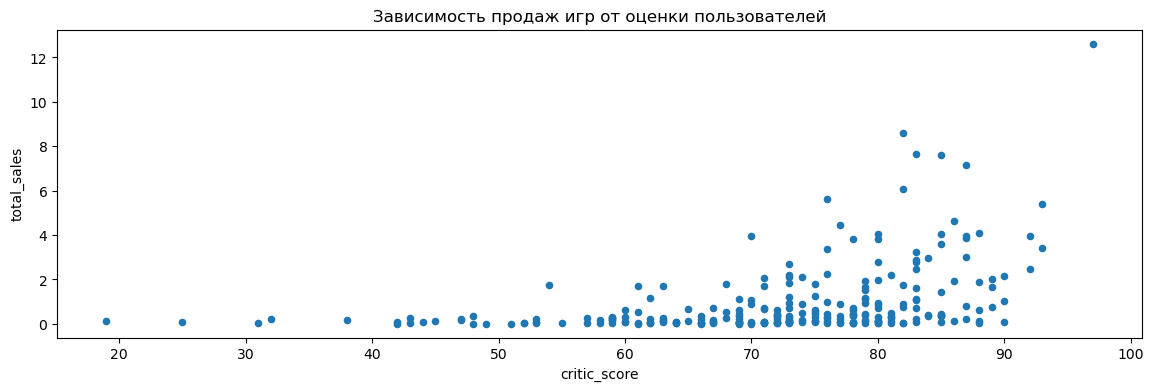

In [40]:
relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())
              & (relevant_data['platform'] == 'PS4')]\
        .plot(x='user_score', y='total_sales', kind='scatter',
                      title='Зависимость продаж игр от оценки пользователей', figsize=(14, 4)
             );
plt.show()

relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())
              & (relevant_data['platform'] == 'PS4')]\
        .plot(x='critic_score', y='total_sales', kind='scatter',
                      title='Зависимость продаж игр от оценки пользователей', figsize=(14, 4)
             );
plt.show()

In [41]:
relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())
              & (relevant_data['platform'] == 'PS4')]\
              [['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


На графике и по значению коэффициента корреляции можно отметить, среднюю положительную связь между глобальными продажами игр и оценкой критиков. Между оценкой пользователей и продажами связи линейной нет.

Также по графику видно, что связь между оценкой критиков и продажами, скорее всего, экспоненциальная, поэтому посчитаем коэффициент корреляции от экспоненциального значения x и сравним эти значения.

In [42]:
relevant_data['exp_critic_score'] = np.exp(relevant_data['critic_score'])
relevant_data['exp_user_score'] = np.exp(relevant_data['user_score'])
relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())
              & (relevant_data['platform'] == 'PS4')]\
              [['critic_score', 'exp_critic_score', 'user_score', 'total_sales']].corr()

,critic_score,exp_critic_score,user_score,total_sales
critic_score,1.000000,0.131691,0.557654,0.405895
exp_critic_score,0.131691,1.000000,0.071274,0.455871
user_score,0.557654,0.071274,1.000000,-0.033625
total_sales,0.405895,0.455871,-0.033625,1.000000


Действительно, экспоненциальная связь сильнее, чем линейная.

#### По всем платформам, кроме PS4

Посмотрим на корреляцию по остальным платформам.

In [43]:
relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())
              & ~(relevant_data['platform'] == 'PS4')]\
              [['user_score', 'critic_score', 'exp_critic_score', 'user_score', 'total_sales']].corr()

,user_score,critic_score,exp_critic_score,user_score,total_sales
user_score,1.000000,0.484718,0.072179,1.000000,0.007321
critic_score,0.484718,1.000000,0.152720,0.484718,0.278847
exp_critic_score,0.072179,0.152720,1.000000,0.072179,0.631346
user_score,1.000000,0.484718,0.072179,1.000000,0.007321
total_sales,0.007321,0.278847,0.631346,0.007321,1.000000


Здесь еще сильнее экспоненциальная зависимость, теперь она уже близка к сильной.

#### По полному кругу платформ

Теперь посмотрим на корреляцию по полному охвату платформ.

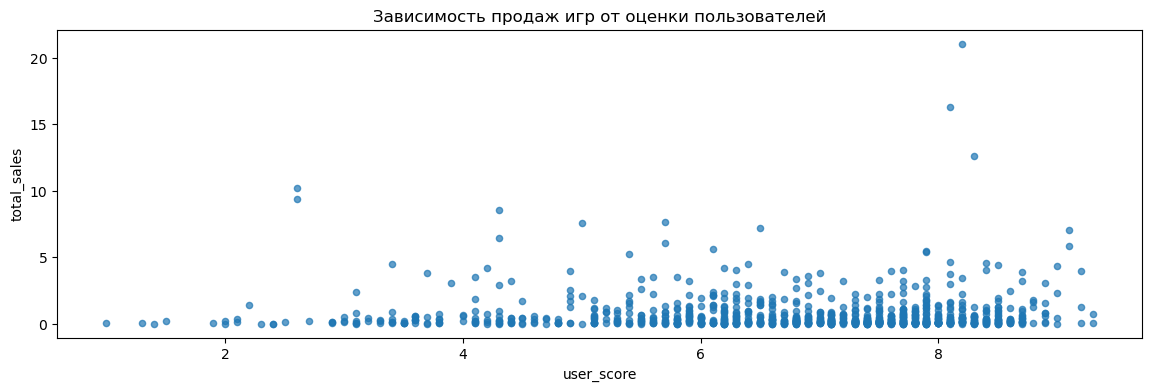

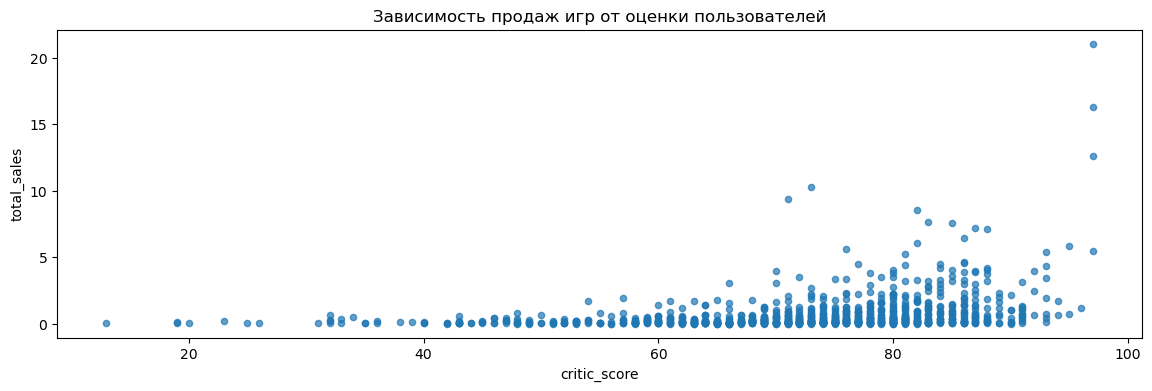

In [44]:
relevant_data[(relevant_data['user_score'].notna()) & (relevant_data['critic_score'].notna())]\
        .plot(x='user_score', y='total_sales', kind='scatter',
                      title='Зависимость продаж игр от оценки пользователей', alpha=0.7, figsize=(14, 4)
             );
plt.show()

relevant_data[(relevant_data['user_score'].notna()) & (relevant_data['critic_score'].notna())]\
        .plot(x='critic_score', y='total_sales', kind='scatter',
                      title='Зависимость продаж игр от оценки пользователей', alpha=0.7, figsize=(14, 4)
             );
plt.show()

In [45]:
relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())]\
              [['user_score', 'critic_score', 'exp_critic_score', 'user_score', 'total_sales']].corr()

,user_score,critic_score,exp_critic_score,user_score,total_sales
user_score,1.000000,0.502354,0.071924,1.000000,-0.003642
critic_score,0.502354,1.000000,0.147636,0.502354,0.311779
exp_critic_score,0.071924,0.147636,1.000000,0.071924,0.575866
user_score,1.000000,0.502354,0.071924,1.000000,-0.003642
total_sales,-0.003642,0.311779,0.575866,-0.003642,1.000000


In [46]:
print(relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())].shape[0], 'единиц наблюдения')

print('или {:.2%}'.format(relevant_data[(relevant_data['user_score'].notna())
              & (relevant_data['critic_score'].notna())].shape[0] / relevant_data.shape[0]))

975 единиц наблюдения
или 45.18%


**Вывод по подразделу:**

1. По итогам анализа была установлена средняя, близкая к сильной экспоненциальная зависимость между глобальными продажами игр и оценкой критиков. Это означает, что чем выше оценка критиков, тем сильнее растут продажи.
2. На самой популярной платформе PS4 эта связь ниже, чем у остальных, но все же находится в пределах среднего уровня.
3. Между глобальными продажами и оценкой пользователей ни линейная, ни экспоненциальная связь не наблюдается.
4. Количество единиц наблюдений при анализе взаимосвязи составило 975 единиц или 45,18% от всех данных за 2013-2016 годы. Это достаточно небольшое количество, поэтому для уточнения результатов исследования я бы рекомендовала увеличить размер изучаемой совокупности.


### Анализ продаж в разрезе жанров

In [47]:
data_by_genre = relevant_data\
                .pivot_table(index='genre', values='total_sales', aggfunc= ['count', 'sum', 'median'])

data_by_genre.columns = ['number_of_games', 'total_sales', 'median_sales']
data_by_genre['ratio_number'] = (100 * data_by_genre['number_of_games'] / data_by_genre['number_of_games'].sum()).round(2)
data_by_genre['ratio_total_sales'] = (100 * data_by_genre['total_sales'] / data_by_genre['total_sales'].sum()).round(2)
data_by_genre.sort_values(by='ratio_total_sales', ascending=False)

,number_of_games,total_sales,median_sales,ratio_number,ratio_total_sales
genre,,,,,
Action,752,320.51,0.110,34.85,29.52
Shooter,187,232.98,0.450,8.67,21.46
Sports,208,149.93,0.250,9.64,13.81
Role-Playing,285,144.86,0.120,13.21,13.34
Misc,146,62.57,0.115,6.77,5.76
Platform,72,41.94,0.225,3.34,3.86
Racing,85,39.89,0.120,3.94,3.67
Fighting,79,35.29,0.130,3.66,3.25
Adventure,211,22.90,0.030,9.78,2.11


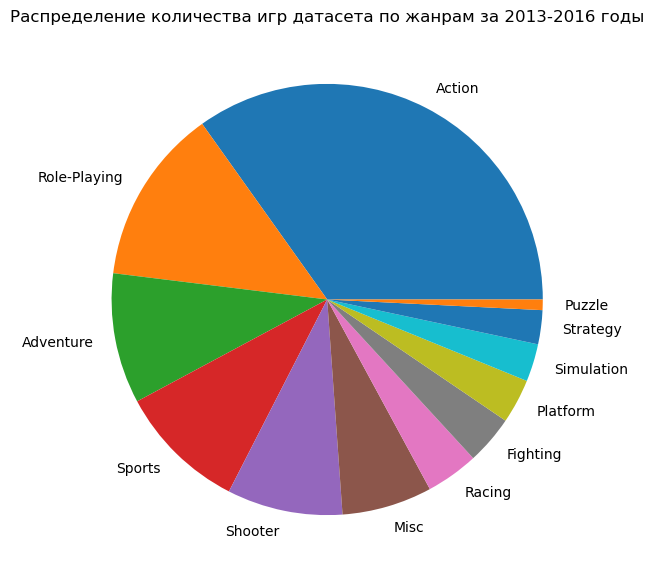

In [48]:
data_by_genre.sort_values(by='number_of_games', ascending=False)\
             .plot(y='number_of_games', kind='pie',
                   title='Распределение количества игр датасета по жанрам за 2013-2016 годы',
                   legend=False, figsize=(7, 7))
plt.ylabel('');

Больше всего на рынке в 2013-2016 годах было представлено игр жанра Action (треть от всего количества игр). Далее по разнообразию ассортимента были жанры Role-Playing, Adventure, Sports и Shooter.

Теперь посмотрим, как распределены продажи по жанрам на графике ниже.

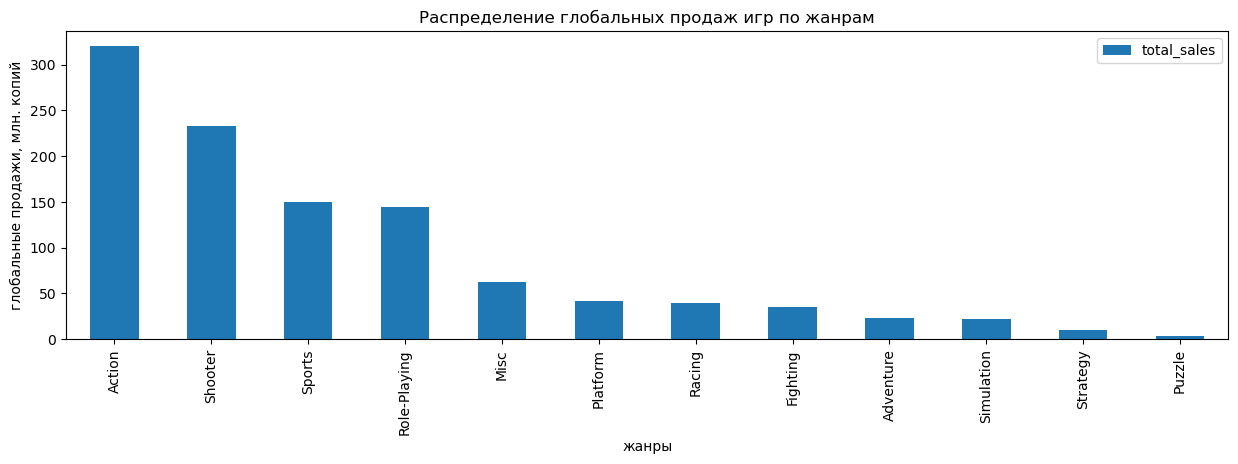

In [49]:
data_by_genre.sort_values(by='ratio_total_sales', ascending=False)\
             .plot(y='total_sales',
                   kind='bar', title='Распределение глобальных продаж игр по жанрам',
                   figsize=(15, 4))

plt.xlabel('жанры')
plt.ylabel('глобальные продажи, млн. копий');

По графикам видно, что самыми продаваемыми играми являются игры жанра Action. Также высокие показатели продаж у жанров Shooter, Sports, Role-Playing. Меньше всего продаж у жанров Puzzle, Strategy, Simulation и Adventure.

Мы помним, что существует ряд игр с продажами, превышающими медиану в несколько раз (некоторые даже в десятки раз). Поэтому, чтобы понять как эти единичные игры повлияли на рейтинг продаж, построим следующий график.

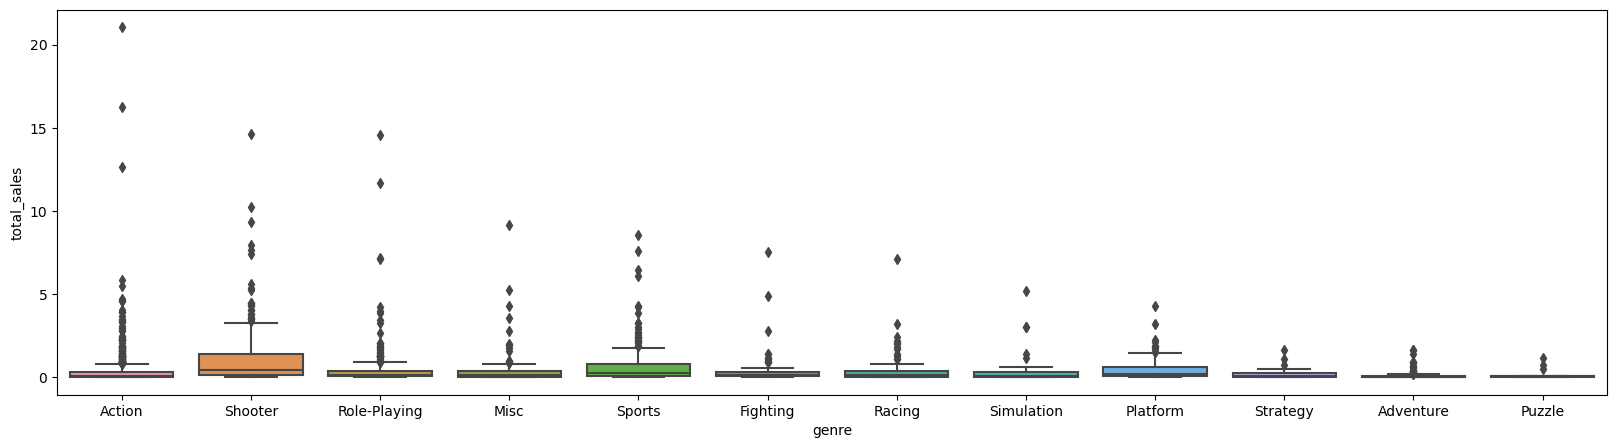

In [50]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='genre', y='total_sales', data=relevant_data)

plt.show()

In [51]:
relevant_data.pivot_table(index=['name', 'genre'], values='total_sales').sort_values(by='total_sales', ascending=False).head()

,,total_sales
name,genre,
Pokemon X/Pokemon Y,Role-Playing,14.600
Pokemon Omega Ruby/Pokemon Alpha Sapphire,Role-Playing,11.680
Grand Theft Auto V,Action,11.316
Pokemon Sun/Moon,Role-Playing,7.140
Mario Kart 8,Racing,7.090


Действительно, высокие продажи единичных игр в жанре Action и Role-Playing оказали сильное влияние на расстановку сил на рынке по жанрам.

Посмотрим "ящики" поближе.

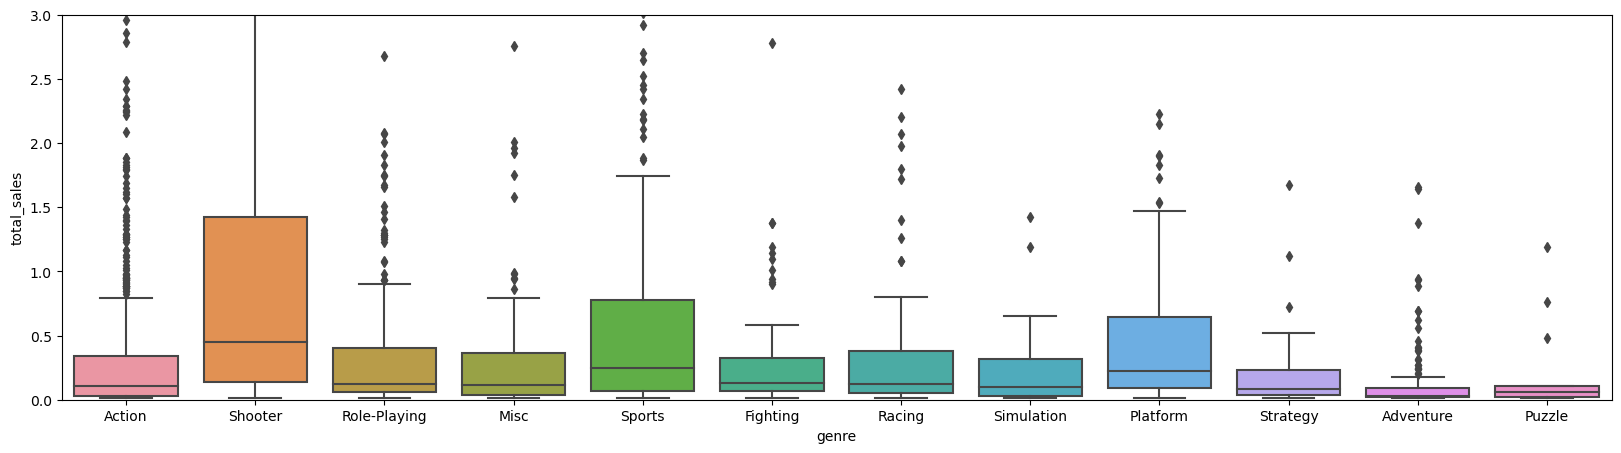

In [52]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='genre', y='total_sales', data=relevant_data)
plt.ylim(0, 3)

plt.show()

Судя по графику, популярными жанрами (без привязки к конкретным играм) являются Shooter и Sports.
По этим жанрам самые высокие как медианные продажи, так и третий квартиль.
Это говорит о том, что 75% игр жанров Shooter и Sports продается лучше 75% игр остальных жанров.

Наименее популярными жанрами были Puzzle и Adventure. Эти жанры и по абсолютным продажам были внизу рейтинга.

**Вывод по разделу:**

1. Рассмотрев распределение игр по году выпуска, были сделаны следующие выводы:
- сильный рост количества выпускаемых игр продолжался до 2009 года, (бум выпуска пришелся на 2008-2009 годы);
- с 2010 по 2012 годы наблюдалось сокращение количества выпущенных игр;
- с 2013 года выпуск игр стабилизовался и сильных изменений рынок уже не претерпевал;
2. Рассмотрев жизненный цикл платформ, были сделаны следующие выводы:
- у 75% платформ жизненный цикл составлял более 3 лет;
- медианный жизненный цикл платформ составил 6 лет;
- для топ-12 популярных платформ жизненный цикл составил более 8 лет.
3. На основе предварительного анализа в качестве релевантного периода для исследования был выбран период 2013-2016 годов.
4. В ходе анализа продаж в разрезе платформ к потенциально прибыльным платформам были отнесены PS4 и XOne. Для этих платформ характерен рост продаж свежевыпущенных игр, высокие абсолютные и медианные продажи.
5. По итогам корреляционного анализа была установлена средняя, близкая к сильной экспоненциальная зависимость между глобальными продажами игр и оценкой критиков, т.е. чем выше оценка критиков, тем сильнее растут продажи.
6. Были определены наиболее и наименее популярные жанры в 2013-2016 годах:
- больше всего на рынке в 2013-2016 годах было представлено игр жанра Action (треть от всего количества игр), далее идут жанры Role-Playing, Adventure, Sports и Shooter;
- самыми продаваемыми играми были игры жанра Action, больше всего на продажи этого жанра повлияли высокие продажи игры Grand Theft Auto V;
- вторым по продаваемости стал жанр Role-Playing за счет таких игр, как Pokemon X/Pokemon Y, Pokemon Omega Ruby/Pokemon Alpha Sapphire и Pokemon Sun/Moon;
- самыми популярными жанрами (после нивелирования влияния высоких продаж отдельным играм) стали Shooter и Sports (75% игр этих жанров продавались лучше 75% игр остальных жанров);
- наименее популярными жанрами стали Puzzle и Adventure.

## Портрет пользователя каждого региона

### Самые популярные платформы по регионам

**Северная Америка**

In [53]:
data_by_platform_na = relevant_data.pivot_table(index='platform', values='na_sales',
                                                aggfunc= ['count', 'sum', 'median']
                                               )
data_by_platform_na.columns = ['number_of_games', 'na_sales', 'median_sales']
data_by_platform_na.sort_values(by='na_sales', ascending=False).head()

,number_of_games,na_sales,median_sales
platform,,,
PS4,392,108.74,0.06
XOne,247,93.12,0.12
X360,186,81.66,0.15
PS3,345,63.50,0.03
3DS,303,38.20,0.00


В Северной Америке самыми популярным платформами по общему количеству продаж в 2013-2016 годах были PS4, XOne, X360, PS3 и 3DS.

**Европа**

In [54]:
data_by_platform_na = relevant_data.pivot_table(index='platform', values='eu_sales',
                                                aggfunc= ['count', 'sum', 'median']
                                               )
data_by_platform_na.columns = ['number_of_games', 'eu_sales', 'median_sales']
data_by_platform_na.sort_values(by='eu_sales', ascending=False).head()

,number_of_games,eu_sales,median_sales
platform,,,
PS4,392,141.09,0.08
PS3,345,67.81,0.02
XOne,247,51.59,0.07
X360,186,42.52,0.08
3DS,303,30.96,0.00


В Европе самыми популярным платформами по общему количеству продаж в 2013-2016 годах были PS4, PS3, XOne, X360, 3DS. В целом предпочтения пользователей платформ из Северной Америки и Европы похожи. Единственным различием выступает платформа PS3: в Северной Америке эта платформа уже постепенно уходит из пользования, а в Европе она еще остается достаточно популярной.

**Япония**

In [55]:
data_by_platform_na = relevant_data.pivot_table(index='platform', values='jp_sales',
                                                aggfunc= ['count', 'sum', 'median']
                                               )
data_by_platform_na.columns = ['number_of_games', 'jp_sales', 'median_sales']
data_by_platform_na.sort_values(by='jp_sales', ascending=False).head()

,number_of_games,jp_sales,median_sales
platform,,,
3DS,303,67.81,0.06
PS3,345,23.35,0.03
PSV,358,18.59,0.03
PS4,392,15.96,0.01
WiiU,115,10.88,0.00


В Японии предпочтения в отношении платформ отличаются от европейских и североамериканских. Японцы больше предпочитают свои собственные платформы и редко приобретают игровые приставки Xbox.

### Самые популярные жанры по регионам

**Северная Америка**

In [56]:
data_by_platform_na = relevant_data.pivot_table(index='genre', values='na_sales',
                                                aggfunc= ['count', 'sum', 'median']
                                               )
data_by_platform_na.columns = ['number_of_games', 'na_sales', 'median_sales']
data_by_platform_na.sort_values(by='na_sales', ascending=False).head()

,number_of_games,na_sales,median_sales
genre,,,
Action,752,125.83,0.02
Shooter,187,109.74,0.20
Sports,208,65.27,0.09
Role-Playing,285,46.40,0.02
Misc,146,27.46,0.02


Самые популярные жанры по общему количеству продаж в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc. По медиане видно, что безотносительно единичных популярных игр больше всего продаются игры жанра Shooter.

**Европа**

In [57]:
data_by_platform_na = relevant_data.pivot_table(index='genre', values='eu_sales',
                                                aggfunc= ['count', 'sum', 'median']
                                               )
data_by_platform_na.columns = ['number_of_games', 'eu_sales', 'median_sales']
data_by_platform_na.sort_values(by='eu_sales', ascending=False).head()

,number_of_games,eu_sales,median_sales
genre,,,
Action,752,117.87,0.02
Shooter,187,87.86,0.19
Sports,208,60.34,0.05
Role-Playing,285,36.97,0.01
Racing,85,20.19,0.06


По жанрам в Европе идентичная ситуация, что и в Северной Америке.

**Япония**

In [58]:
data_by_platform_na = relevant_data.pivot_table(index='genre', values='jp_sales',
                                                aggfunc= ['count', 'sum', 'median']
                                               )
data_by_platform_na.columns = ['number_of_games', 'jp_sales', 'median_sales']
data_by_platform_na.sort_values(by='jp_sales', ascending=False).head()

,number_of_games,jp_sales,median_sales
genre,,,
Role-Playing,285,50.01,0.05
Action,752,39.65,0.01
Misc,146,9.03,0.02
Fighting,79,7.63,0.03
Shooter,187,6.61,0.00


Как и с платформами, предпочтения в жанрах у японцев отличаются от европейцев и североамериканцев. Здесь самые популярные жанры: Role-Playing, Action, Misc, Fighting, Shooter. Причем, если в Европе и Северной Америке у жанра Shooter медианные продажи самые высокие среди всех, то в Японии медиана по продажам равна 0. Что говорит о том, что в Японии продаются только единичные игры этого жанра.

### Влияние ли рейтинг ESRB на продажи по регионам

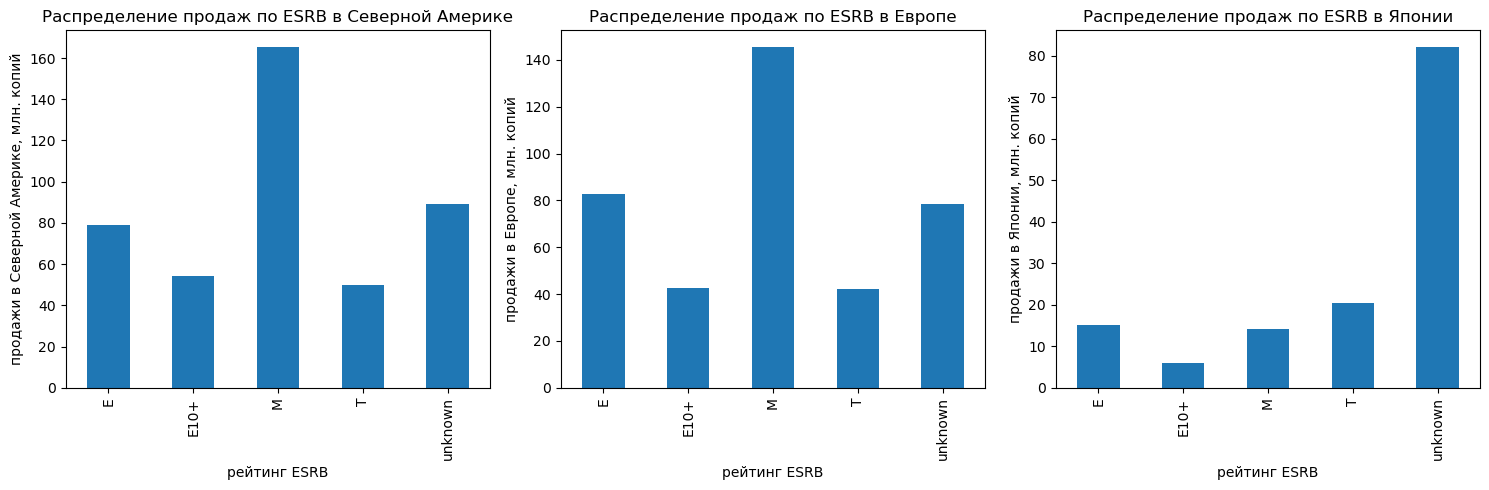

In [59]:
plt.subplot(1, 3, 1)
relevant_data.groupby('rating')['na_sales'].sum().plot(kind='bar',
                   title='Распределение продаж по ESRB в Северной Америке',
                   figsize=(15, 5))
plt.xlabel('рейтинг ESRB')
plt.ylabel('продажи в Северной Америке, млн. копий');
plt.subplot(1, 3, 2)
relevant_data.groupby('rating')['eu_sales'].sum().plot(kind='bar',
                   title='Распределение продаж по ESRB в Европе',
                   figsize=(15, 5))
plt.xlabel('рейтинг ESRB')
plt.ylabel('продажи в Европе, млн. копий');
plt.subplot(1, 3, 3)
relevant_data.groupby('rating')['jp_sales'].sum().plot(kind='bar',
                   title='Распределение продаж по ESRB в Японии',
                   figsize=(15, 5))
plt.xlabel('рейтинг ESRB')
plt.ylabel('продажи в Японии, млн. копий');
plt.tight_layout()
plt.show()

Здесь мы снова видим похожесть портрета пользователя в Северной Америке и Европе и отличие японских пользователей. Самыми популярными играми в Северной Америке и Европе являются игры с рейтингом M (для лиц старше 17 лет). В Японии больше всего игр без рейтинга ESRB. Скорее всего, это связано с наличием в этой стране своей собственной организации, присваивающей рейтинг играм - CERO.

**Выводы по разделу:**

По итогам анализа был составлен портрет пользователя по регионам:
1. Пользователи из Северной Америки предпочитают платформы PS4, XOne, X360, PS3 и 3DS. Самыми популярными жанрами являются Action, Shooter, Sports, Role-Playing, Misc. Самый популярный рейтинг ESRB - M (для лиц старше 17 лет).


2. Портрет пользователя из Европы похож на североамериканского пользователя. Единственным отличием является сохраняющаяся популярность платформы PS3.


3. Пользователи из Японии предпочитают платформы местного производства - 3DS, PS3, PSV, PS4, WiiU. И не особо жалуют Xbox. Японцы предпочитают игры жанров Role-Playing, Action, Misc. Что касается рейтингов, то играм в Японии присваевает другая организация CERO, поэтому для анализа необходима дополнительная информация.

## Проверка гипотез

#### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

В качестве статистического теста выбран t-тест, поскольку:
- генеральные совокупности независимы друг от друга;
- размер изучаемых совокупностей достаточен, чтобы считать, что выборочные средние будут нормально распределены вокруг истинного среднего этой совокупности.

In [60]:
print('Объем изучаемой совокупности по Xbox One:', relevant_data[(relevant_data['platform'] == 'XOne')
                                     & (relevant_data['user_score'].notna())].shape[0])
print('Объем изучаемой совокупности по PC:', relevant_data[(relevant_data['platform'] == 'PC')
                                     & (relevant_data['user_score'].notna())].shape[0])

Объем изучаемой совокупности по Xbox One: 182
Объем изучаемой совокупности по PC: 155


В качестве нулевой и альтернативной гипотез примем следующие:
```
H_0: Средние пользовательские рейтинги платформы Xbox One = средние пользовательские рейтинги платформы PC
H_a: Средние пользовательские рейтинги платформы Xbox One ≠ средние пользовательские рейтинги платформы PC
alpha = 0.05
```
В качестве порогового значения альфа выбраны стандартные для бизнеса 5%.

In [61]:
results = st.ttest_ind(relevant_data[(relevant_data['platform'] == 'XOne')
                                     & (relevant_data['user_score'].notna())]['user_score'],
                       relevant_data[(relevant_data['platform'] == 'PC')
                                     & (relevant_data['user_score'].notna())]['user_score'],
                       equal_var=False
                      )

alpha = 0.05

print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [62]:
bil_out_promo = [3004, 3932, 1334, 1918, 3740, 3672,  115, 1511, 2913, 3219, 3555,
       3070,  379, 3626,  494, 1254,  744, 3731, 3878,  503, 1356, 3474,
       1350, 2207, 3567, 3397, 1929, 3970, 2615,  812, 3649, 1075, 1466,
       3317, 2389, 3425, 3406, 3240, 1895,  687]

bil_in_promo = [3291, 4010, 3837, 2878, 2621, 3959, 1270, 1686, 1057, 1942,  364,
       2268, 2228,  564, 3367, 2313, 1532,  867, 1784, 2250, 2914, 2540,
        830, 2912, 3337, 2623, 1944, 1157, 3605, 1577,  775, 1682,  883,
       3112, 3680, 1973, 3885, 3394, 2677,  304, 1755, 3840,  350, 3585,
       3309]
print(sum(bil_out_promo)/len(bil_out_promo))
print(sum(bil_in_promo)/len(bil_in_promo))

2395.45
2282.911111111111


In [63]:
results = st.ttest_ind(bil_out_promo, bil_in_promo, equal_var=False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.662279765778139
Не получилось отвергнуть нулевую гипотезу


In [64]:
for i in range(45):
    print(bil_in_promo[i])

3291
4010
3837
2878
2621
3959
1270
1686
1057
1942
364
2268
2228
564
3367
2313
1532
867
1784
2250
2914
2540
830
2912
3337
2623
1944
1157
3605
1577
775
1682
883
3112
3680
1973
3885
3394
2677
304
1755
3840
350
3585
3309


Значение p равно почти 15%. Это достаточно большое значение, чтобы отвергать нулевую гипотезу. Следовательно, различия между средними пользовательскими рейтингами платформ Xbox One и PC статистически незначимы.

#### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"

В качестве статистического теста выбран t-тест, поскольку:
- генеральные совокупности независимы друг от друга;
- размер изучаемых совокупностей достаточен, чтобы считать, что выборочные средние будут нормально распределены вокруг истинного среднего этой совокупности.

In [65]:
print('Объем изучаемой совокупности по жанру Action:', relevant_data[(relevant_data['genre'] == 'Action')
                                     & (relevant_data['user_score'].notna())].shape[0])
print('Объем изучаемой совокупности по жанру Sports:', relevant_data[(relevant_data['genre'] == 'Sports')
                                     & (relevant_data['user_score'].notna())].shape[0])

Объем изучаемой совокупности по жанру Action: 388
Объем изучаемой совокупности по жанру Sports: 159


В качестве нулевой и альтернативной гипотез примем следующие:
```
H_0: Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports
H_a: Средние пользовательские рейтинги жанра Action ≠ средние пользовательские рейтинги жанра Sports
alpha = 0.01
```
В качестве порогового значения альфа выбраны стандартные для бизнеса 5%.

In [66]:
results = st.ttest_ind(relevant_data[(relevant_data['genre'] == 'Action')
                                     & (relevant_data['user_score'].notna())]['user_score'],
                       relevant_data[(relevant_data['genre'] == 'Sports')
                                     & (relevant_data['user_score'].notna())]['user_score'],
                       equal_var=False
                      )

alpha = 0.05

print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.419141451747253e-20
Отвергаем нулевую гипотезу


In [67]:
listo = np.random.randint(1500, 4000, 45)
listo

array([3754, 2311, 3606, 2348, 2029, 3463, 3665, 2796, 3516, 3764, 2163,
       2069, 3389, 2044, 2295, 2790, 1504, 3709, 2819, 3141, 1745, 2228,
       1965, 2259, 1898, 2453, 3628, 3355, 1560, 2103, 1807, 3008, 1587,
       1647, 3778, 1941, 2670, 1676, 2203, 2290, 2954, 2767, 1722, 3023,
       2375])

In [68]:
bills_in_promo = [1768, 2270, 2437, 2430, 2655, 1576, 2107, 2640, 2765, 3128, 2795,
       3836, 3172, 3424, 2563, 1556, 2049, 1932, 1549, 1793, 1520, 2173,
       2290, 1553, 1791, 2672, 1854, 2966, 3066, 1963, 1984, 2331, 1635,
       2358, 2935, 3735, 2915, 2033, 2723, 2841, 1594, 1585, 2689, 2905,
       1646]

bills_out_promo = [3004, 3932, 1334, 1918, 3740, 3672, 115, 1511, 2913,
                   3219, 3555, 3070,  379, 3626,  494, 1254,  744, 3731,
                   3878,  503, 1356, 3474, 1350, 2207, 3567, 3397, 1929,
                   3970, 2615,  812, 3649, 1075, 1466, 3317, 2389, 3425,
                   3406, 3240, 1895,  687]
results = st.ttest_ind(bills_in_promo,
                       bills_out_promo,
                       equal_var=False
                      )

alpha = 0.05

print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.8700297961592409
Не получилось отвергнуть нулевую гипотезу


In [69]:
for i in range(len(bills_in_promo)):
    print(bills_in_promo[i])

1768
2270
2437
2430
2655
1576
2107
2640
2765
3128
2795
3836
3172
3424
2563
1556
2049
1932
1549
1793
1520
2173
2290
1553
1791
2672
1854
2966
3066
1963
1984
2331
1635
2358
2935
3735
2915
2033
2723
2841
1594
1585
2689
2905
1646


Действительно, средние пользовательские рейтинги жанров Action и Sports разные. Различия между этими средними статистически значимы, о чем свидетельствует очень маленькое значение p. 

**Вывод по разделу:**

В ходе проверки гипотез мы подтвердили:

- отсутствие значимых различий между средними пользовательскими рейтингами платформ Xbox One и PC;
- наличие значимых различий в средних пользовательских рейтингах игр жанров Action и Sports.

## Общий вывод

**Выводы по разделу:**

1. В ходе предобработки данных были обнаружены и проанализированы объекты с пропущенные значениями. Точные причины наличия пропусков установить не удалось, но можно предположить, что по годам релиза данные были утеряны при выгрузке/загрузке в базу данных, а по оценкам и рейтингу такая информация не собиралась.


2. Рассмотрев распределение игр по году выпуска, были сделаны следующие выводы:
- сильный рост количества выпускаемых игр продолжался до 2009 года, (бум выпуска пришелся на 2008-2009 годы);
- с 2010 по 2012 годы наблюдалось сокращение количества выпущенных игр;
- с 2013 года выпуск игр стабилизовался и сильных изменений рынок уже не претерпевал;


3. Рассмотрев жизненный цикл платформ, были сделаны следующие выводы:
- у 75% платформ жизненный цикл составлял более 3 лет;
- медианный жизненный цикл платформ составил 6 лет;
- для топ-12 популярных платформ жизненный цикл составил более 8 лет.

4. В ходе анализа продаж в разрезе платформ к потенциально прибыльным платформам были отнесены PS4 и XOne. Для этих платформ характерен рост продаж свежевыпущенных игр, высокие абсолютные и медианные продажи.


5. По итогам корреляционного анализа была установлена средняя, близкая к сильной экспоненциальная зависимость между глобальными продажами игр и оценкой критиков, т.е. чем выше оценка критиков, тем сильнее растут продажи.


6. Были определены наиболее и наименее популярные жанры в 2013-2016 годах:
- больше всего на рынке в 2013-2016 годах было представлено игр жанра Action (треть от всего количества игр), далее идут жанры Role-Playing, Adventure, Sports и Shooter;
- самыми продаваемыми играми были игры жанра Action, больше всего на продажи этого жанра повлияли высокие продажи игры Grand Theft Auto V;
- вторым по продаваемости стал жанр Role-Playing за счет таких игр, как Pokemon X/Pokemon Y, Pokemon Omega Ruby/Pokemon Alpha Sapphire и Pokemon Sun/Moon;
- самыми популярными жанрами (после нивелирования влияния высоких продаж по отдельным играм) стали Shooter и Sports (75% игр этих жанров продавались лучше 75% игр остальных жанров);
- наименее популярными жанрами стали Puzzle и Adventure.


7. Был составлен портрет пользователя по регионам:
- Пользователи из Северной Америки предпочитают платформы PS4, XOne, X360, PS3 и 3DS. Самыми популярными жанрами являются Action, Shooter, Sports, Role-Playing, Misc. Самый популярный рейтинг ESRB - M (для лиц старше 17 лет).
- Портрет пользователя из Европе похож на североамериканского пользователя. Единственным отличием является сохраняющаяся популярность платформы PS3.
- Пользователи из Японии предпочитают платформы местного производства - 3DS, PS3, PSV, PS4, WiiU. И не особо жалуют Xbox. Японцы предпочитают игры жанров Role-Playing, Action, Misc. Что касается рейтингов, то играм в Японии присваевает другая организация CERO, поэтому для анализа необходима дополнительная информация.

8. В ходе проверки гипотез мы подтвердили:
- отсутствие значимых различий между средними пользовательскими рейтингами платформ Xbox One и PC;
- наличие значимых различий в средних пользовательских рейтингах игр жанров Action и Sports.